# Roundoff in finite differences

Let $f(x)=e^{-1.3x}$. We apply finite difference formulas of first, second, and fourth order to estimate $f'(0)=-1.3$.

In [1]:
using FundamentalsNumericalComputation

In [6]:
f = x -> exp(-1.3*x);
exact = -1.3

h = 10.0.^(-1:-1:-12)
FD1,FD2,FD4 = [],[],[]
for h in h 
    nodes = h*(-2:2)
    vals = @. f(nodes)/h
    push!(FD1, dot([   0    0 -1    1     0],vals) )
    push!(FD2, dot([   0 -1/2  0  1/2     0],vals) )
    push!(FD4, dot([1/12 -2/3  0  2/3 -1/12],vals) )
end

pretty_table((h=h,FD1=FD1,FD2=FD2,FD4=FD4),alignment=:l,backend=:html)

h,FD1,FD2,FD4
Float64,Any,Any,Any
0.1,-1.2190456907943883,-1.3036647620203023,-1.2999875986418996
0.01,-1.2915864979712381,-1.3000366169760795,-1.2999999987623276
0.001,-1.2991553660477848,-1.3000003661667279,-1.2999999999998408
0.0001,-1.2999155036632146,-1.3000000036618076,-1.3000000000006366
1.0e-5,-1.2999915500404313,-1.3000000000465661,-1.3000000000174623
1.0e-6,-1.299999154987745,-1.2999999999883585,-1.30000000007567
1.0e-7,-1.2999999150633812,-1.300000000745058,-1.300000000395812
1.0e-8,-1.2999999970197678,-1.3000000044703484,-1.300000005401671
1.0e-9,-1.2999999523162842,-1.3000000715255737,-1.3000000566244125


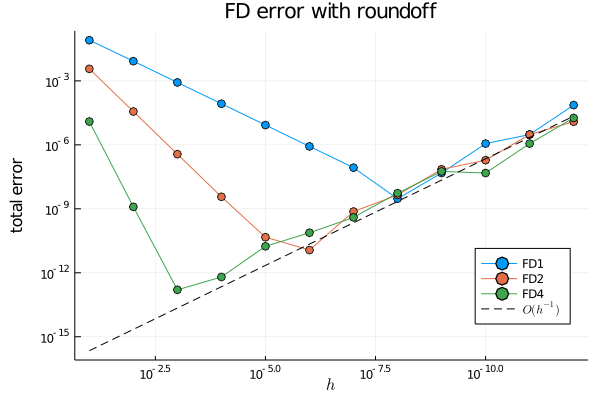

In [8]:
err = @. abs([FD1 FD2 FD4] - exact)

plot(h,err,m=:o,label=["FD1" "FD2" "FD4"],
    xaxis=(:log10,"\$h\$"), xflip=true, yaxis=(:log10,"total error"),
    title="FD error with roundoff", legend=:bottomright)

plot!(h,0.1*eps()./h,l=:dash,color=:black,label="\$O(h^{-1})\$")

Again the graph is made so that $h$ decreases from left to right. The errors are dominated at first by truncation error, which decreases most rapidly for the 4th order formula. However, increasing roundoff error eventually equals and then dominates the truncation error as $h$ continues to decrease. As the order of accuracy increases, the crossover point moves to the left (greater efficiency) and down (greater accuracy).